In [58]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, metrics, datasets
from joblib import dump, load

In [4]:
# Importing the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
# Creating a dataframe from the dataset

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [27]:
# Analyzing the data

df_0 = df[df['target'] == 0]
df_0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df_1 = df[df['target'] == 1]
df_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [29]:
df_2 = df[df['target'] == 2]
df_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


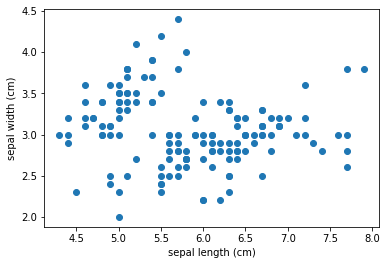

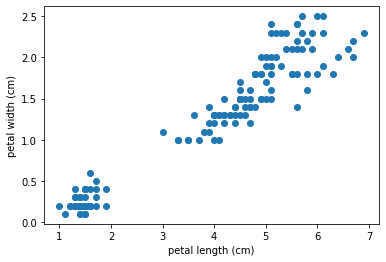

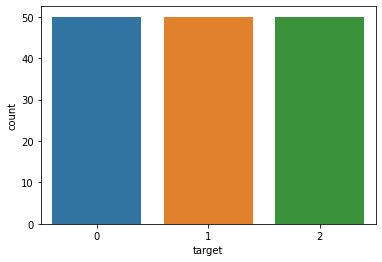

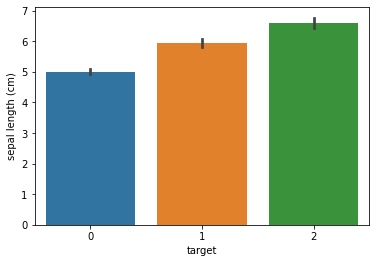

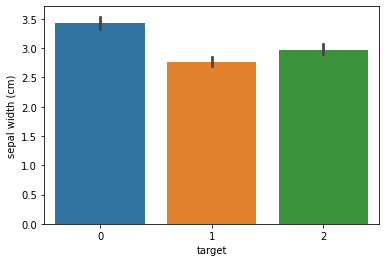

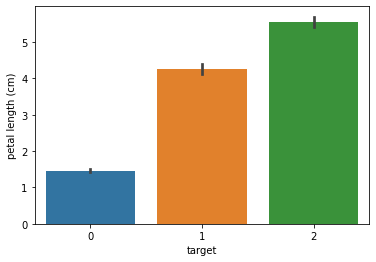

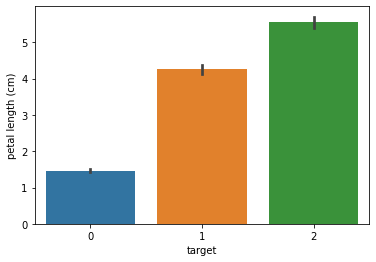

In [64]:
# Visualizing the data

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.show()

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.show()

sns.countplot(x = 'target', data = df)
plt.show()

sns.barplot(x = "target", y = "sepal length (cm)", data = df) 
plt.show()

sns.barplot(x = "target", y = "sepal width (cm)", data = df) 
plt.show()

sns.barplot(x = "target", y = "petal length (cm)", data = df) 
plt.show()

sns.barplot(x = "target", y = "petal length (cm)", data = df) 
plt.show()

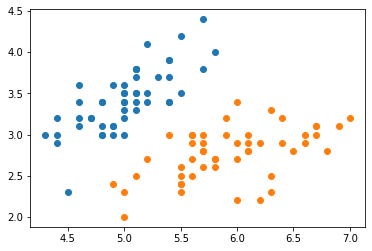

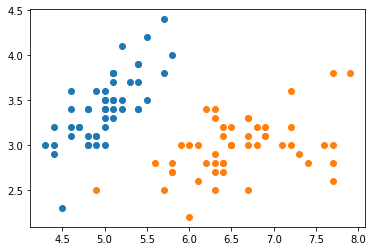

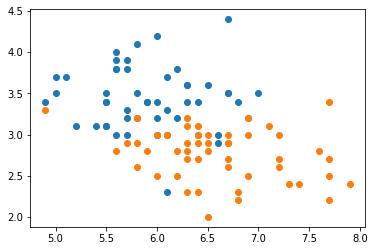

In [33]:
plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'])
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'])
plt.show()

plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'])
plt.scatter(df_2['sepal length (cm)'], df_2['sepal width (cm)'])
plt.show()

plt.scatter(df_1['sepal length (cm)'], df_0['sepal width (cm)'])
plt.scatter(df_2['sepal length (cm)'], df_1['sepal width (cm)'])
plt.show()

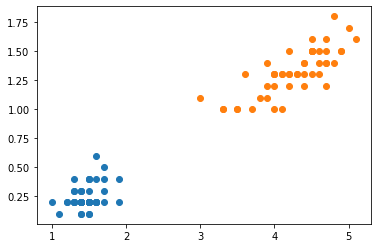

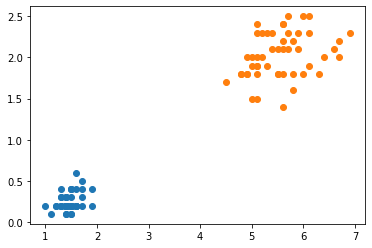

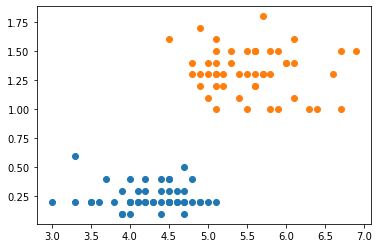

In [34]:
plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'])
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'])
plt.show()

plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'])
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'])
plt.show()

plt.scatter(df_1['petal length (cm)'], df_0['petal width (cm)'])
plt.scatter(df_2['petal length (cm)'], df_1['petal width (cm)'])
plt.show()

In [36]:
# Splitting the data into training and testing data

X = df.drop('target', axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [39]:
# Fitting the model

model = linear_model.LogisticRegression(max_iter = 100000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [42]:
# Making predictions

y_predicted = model.predict(X_test)
print(y_predicted, y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2] [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


In [57]:
# Checking the accuracy of the model

print(model.score(X_test, y_test))

print(metrics.r2_score(y_test, y_predicted))

print(metrics.classification_report(y_test, y_predicted))

0.9666666666666667
0.9381443298969072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



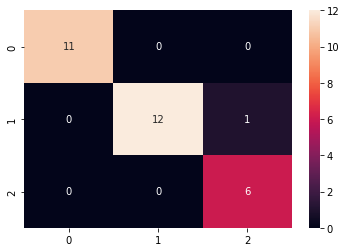

In [48]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()

In [60]:
# Saving the model into memory

dump(model, "iris_classifier")

['iris_classifier']